# Loan Prediction Project 

In this project we will be working with a loan customer behaviour data set, indicating whether or not a loan customer will default on loan or not. We will try to create a model that will predict whether or not they will default on a loan based on customer behaviour.

This data set contains the following features:

* 'income': Income of the user
* 'Age': cutomer age in years
* 'experience': Professional experience of the user in years
* 'profession': Profession
* 'married': Whether married or single
* 'City': City of consumer
* 'house_ownership': Owned or rented or neither
* 'currentjobyears': Years of experience in the current job
* 'currenthouseyears': Number of years in the current residence
* 'risk_flag	': Defaulted on a loan
* 'state	': State of residence



In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
%matplotlib inline
sns.set_style("whitegrid")
sns.set_theme()

In [2]:
customer = pd.read_csv('Training Data.csv')

In [3]:
customer.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
customer.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
customer.drop('Id',axis = 1, inplace = True)

In [7]:
customer.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [8]:
customer.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [9]:
corr = customer.corr()
corr

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


<AxesSubplot:>

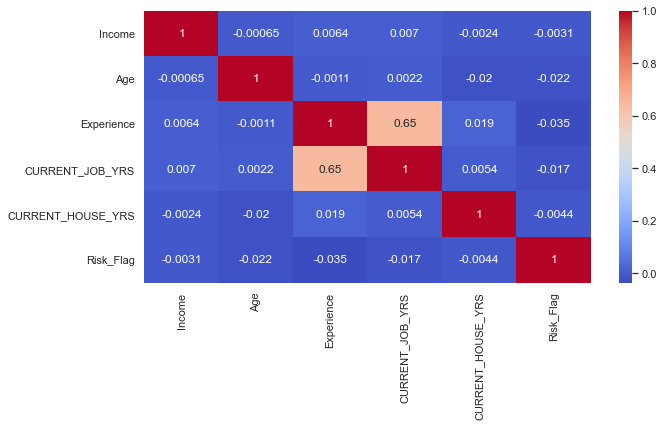

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot = True,cmap = 'coolwarm')

* From the correlation we can see that customer who have bigger income and and have lived in their house for a long time tend not to default on loans 
* overall the higher the number in the variable the less likely they are to default on loan

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

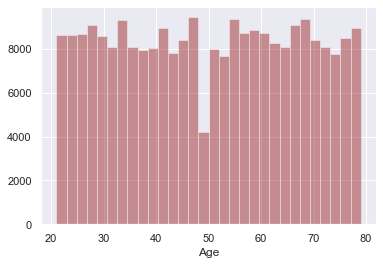

In [11]:
sns.distplot(customer['Age'],kde=False,color='darkred',bins = 30)

<AxesSubplot:xlabel='Experience', ylabel='count'>

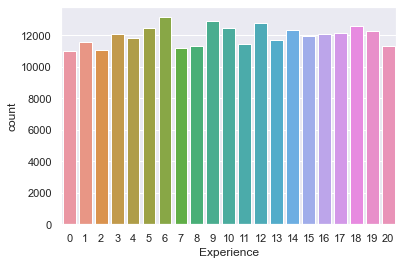

In [12]:
sns.countplot(x='Experience',data=customer)

In [13]:
customer['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

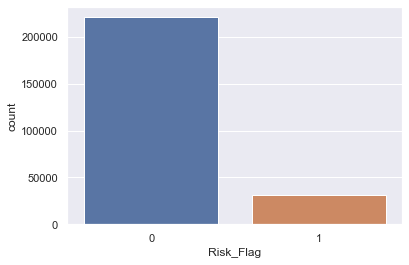

In [15]:
sns.countplot(x='Risk_Flag', data=customer)

from the value counts and countplot we can see that the data is very unbalanced which can cause poor performance in prediction, to overcome this we will do SMOTE(Synthetic Minority Oversampling Technique

<AxesSubplot:xlabel='CURRENT_HOUSE_YRS', ylabel='count'>

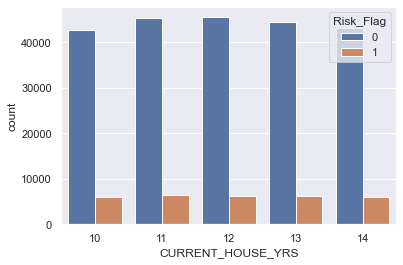

In [16]:
sns.countplot(x='CURRENT_HOUSE_YRS',hue ='Risk_Flag', data=customer)

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

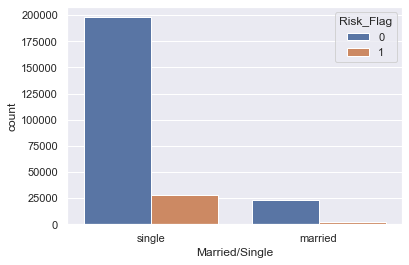

In [17]:
sns.countplot(x='Married/Single',hue ='Risk_Flag', data=customer)

In [18]:
customer['Profession'].nunique()

51

In [19]:
customer['Profession'].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

<AxesSubplot:xlabel='Risk_Flag', ylabel='Age'>

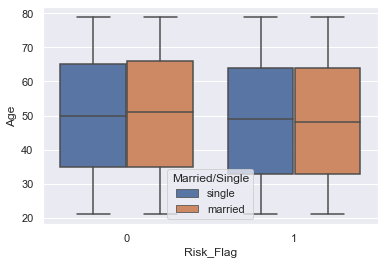

In [20]:
sns.boxplot(x='Risk_Flag',y='Age',hue='Married/Single',data=customer)

In [21]:
customer['Income']/ 1000

0         1303.834
1         7574.516
2         3991.815
3         6256.451
4         5768.871
            ...   
251995    8154.883
251996    2843.572
251997    4522.448
251998    6507.128
251999    9070.230
Name: Income, Length: 252000, dtype: float64

In [22]:
customer.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [23]:
Marriage = pd.get_dummies(customer['Married/Single'],drop_first=True)
House_Ownership = pd.get_dummies(customer['House_Ownership'],drop_first=True)
Car_Ownership = pd.get_dummies(customer['Car_Ownership'],drop_first=True)

In [24]:
customer.drop(['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE',],axis=1,inplace=True)

In [25]:
customer

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,3,13,0
1,7574516,40,10,9,13,0
2,3991815,66,4,4,10,0
3,6256451,41,2,2,12,1
4,5768871,47,11,3,14,1
...,...,...,...,...,...,...
251995,8154883,43,13,6,11,0
251996,2843572,26,10,6,11,0
251997,4522448,46,7,7,12,0
251998,6507128,45,0,0,10,0


In [26]:
customer = pd.concat([customer,Marriage,House_Ownership,Car_Ownership],axis=1)

In [27]:
customer

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,single,owned,rented,yes
0,1303834,23,3,3,13,0,1,0,1,0
1,7574516,40,10,9,13,0,1,0,1,0
2,3991815,66,4,4,10,0,0,0,1,0
3,6256451,41,2,2,12,1,1,0,1,1
4,5768871,47,11,3,14,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,6,11,0,1,0,1,0
251996,2843572,26,10,6,11,0,1,0,1,0
251997,4522448,46,7,7,12,0,1,0,1,0
251998,6507128,45,0,0,10,0,1,0,1,0


In [28]:
X = customer.drop('Risk_Flag',axis=1)
y = customer['Risk_Flag']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [34]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
dct_predict = dct.predict(X_test)

In [41]:
print(accuracy_score (y_test, dct_predict))
print(roc_auc_score (y_test, dct_predict))

0.8827513227513227
0.7482528578965154


<AxesSubplot:>

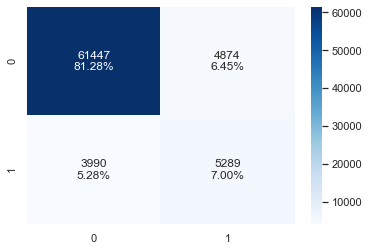

In [50]:
dct_cfm = confusion_matrix(y_test,dct_predict)

group_counts = ['{0:0.0f}'.format(value) for value in
                dct_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     dct_cfm.flatten()/np.sum(dct_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(dct_cfm, annot=labels, fmt='', cmap='Blues')

* DecisionTreeClassifier give us 0.89 accuracy and 0.74 auc score 
* From the confusion matrix we can see that the model is tend to have 0 for the output it is because the data is imbalance

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)

In [53]:
print(accuracy_score (y_test, lr_predictions))
print(roc_auc_score (y_test, lr_predictions)) 

0.8772619047619048
0.5


<AxesSubplot:>

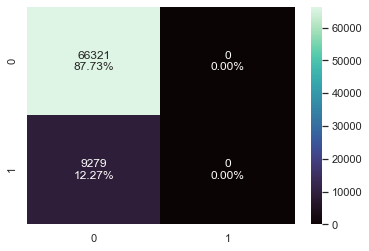

In [58]:
lr_cfm = confusion_matrix(y_test,lr_predictions)

group_counts = ['{0:0.0f}'.format(value) for value in
                lr_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     lr_cfm.flatten()/np.sum(dct_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_cfm, annot=labels, fmt='', cmap='mako')

* LogisticRegression give us 0.88 accuracy and 0.5 auc score
* From the confusion matrix we can see that the model always give negative or 0 for the output so even though it has high accuracy this model cannot be used 

In [62]:
from sklearn.ensemble import RandomForestClassifier

rft = RandomForestClassifier()
rft.fit(X_train,y_train)
rft_predict = rft.predict(X_test)

In [63]:
print(accuracy_score (y_test, rft_predict))
print(roc_auc_score (y_test, rft_predict)) 

0.8986243386243387
0.7451107610808795


<AxesSubplot:>

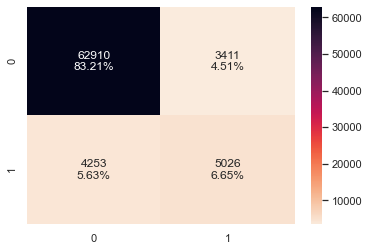

In [66]:
rft_cfm = confusion_matrix(y_test,rft_predict)

group_counts = ['{0:0.0f}'.format(value) for value in
                rft_cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     rft_cfm.flatten()/np.sum(dct_cfm)]
labels = [f'{v2}\n{v3}' for  v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rft_cfm, annot=labels, fmt='', cmap='rocket_r')

* RandomForestClassifier give us 0.90 accuracy and 0.75 auc score 
* From the confusion matrix we can see that the model is tend to have 0 for the output it is because the data is imbalance

##  Conclusion

* From the three model that we use RandomForestClassifier give us higher accuracy and auc score than the other two model that we use 
* There will be improvement soon to have bette auc score any feedback is welcome and appreciated